# EDA

In [1]:
# データの取り扱いに関するライブラリ
import numpy as np # 高速計算
import pandas as pd # 表データの扱い

# 可視化に関するライブラリ
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

## ファイルの読み込み

In [2]:
# 自身がファイルを格納したディレクトリを指定
root_dir = '../src/'
train_file_path = root_dir + 'input/train.csv'
test_file_path = root_dir + 'input/test.csv'
submit_file_path = root_dir + 'submit_sample.csv'
output_path = root_dir + 'output/'

In [3]:
train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

## EDA（探索的データ分析）

#### データの確認

In [4]:
# データの中身を確認（3行だけ）
print('trainの出力')
display(train_df.head(3))
print('\n============================\n')
print('testの出力')
display(test_df.head(3))

trainの出力


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown,1
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown,1
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure,1




testの出力


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,30,management,single,tertiary,no,1028,no,no,cellular,4,feb,1294,2,-1,0,unknown
1,2,39,self-employed,single,tertiary,no,426,no,no,unknown,18,jun,1029,1,-1,0,unknown
2,3,38,technician,single,tertiary,no,-572,yes,yes,unknown,5,jun,26,24,-1,0,unknown


In [5]:
# 行数と列数を確認
print('trainの出力')
print(train_df.shape)
print('\n============================\n')
print('testの出力')
print(test_df.shape)

trainの出力
(27128, 18)


testの出力
(18083, 17)


In [ ]:
# データ型
print('trainの出力')
print(train_df.info())
print('\n============================\n')
print('testの出力')
print(test_df.info())

trainの出力
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27128 entries, 0 to 27127
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         27128 non-null  int64 
 1   age        27128 non-null  int64 
 2   job        27128 non-null  object
 3   marital    27128 non-null  object
 4   education  27128 non-null  object
 5   default    27128 non-null  object
 6   balance    27128 non-null  int64 
 7   housing    27128 non-null  object
 8   loan       27128 non-null  object
 9   contact    27128 non-null  object
 10  day        27128 non-null  int64 
 11  month      27128 non-null  object
 12  duration   27128 non-null  int64 
 13  campaign   27128 non-null  int64 
 14  pdays      27128 non-null  int64 
 15  previous   27128 non-null  int64 
 16  poutcome   27128 non-null  object
 17  y          27128 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 3.7+ MB
None


testの出力
<class 'pandas.core.frame.DataFrame'>

In [ ]:
# 欠損率
print('trainの出力')
print(train_df.isna().mean())
print('\n============================\n')
print('testの出力')
print(test_df.isna().mean())

# NOTE: 欠損はなし

trainの出力
id           0.0
age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64


testの出力
id           0.0
age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
dtype: float64


In [ ]:
# 要約統計量の確認
print('trainの出力')
display(train_df.describe())
print('\n============================\n')
print('testの出力')
display(test_df.describe())

trainの出力


,id,age,balance,day,duration,campaign,pdays,previous,y
count,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000
mean,13564.500000,40.951010,1355.800870,15.806215,260.711295,2.751769,40.528052,0.579733,0.117001
std,7831.323388,10.608542,3003.305272,8.337904,260.091727,3.126594,100.382462,2.503653,0.321427
min,1.000000,18.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,6782.750000,33.000000,72.000000,8.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,13564.500000,39.000000,449.000000,16.000000,182.000000,2.000000,-1.000000,0.000000,0.000000
75%,20346.250000,48.000000,1428.000000,21.000000,323.000000,3.000000,-1.000000,0.000000,0.000000
max,27128.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000




testの出力


,id,age,balance,day,duration,campaign,pdays,previous
count,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000
mean,9042.000000,40.914008,1371.980092,15.806725,254.340264,2.781950,39.702428,0.581209
std,5220.256794,10.634331,3105.985293,8.299509,253.591981,3.054651,99.747634,1.965265
min,1.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,4521.500000,33.000000,72.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,9042.000000,39.000000,447.000000,16.000000,178.000000,2.000000,-1.000000,0.000000
75%,13562.500000,48.000000,1427.000000,21.000000,314.000000,3.000000,-1.000000,0.000000
max,18083.000000,95.000000,98417.000000,31.000000,3881.000000,50.000000,854.000000,58.000000


In [ ]:
# カテゴリカラムのユニーク値
cat_cols = [
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month'
]

for cat_col in cat_cols:
    print('train')
    display(train_df[cat_col].value_counts())
    print('============================')
    print('test')
    display(test_df[cat_col].value_counts())

train


job
blue-collar      5886
management       5620
technician       4491
admin.           3085
services         2506
retired          1391
self-employed     945
entrepreneur      914
unemployed        790
housemaid         765
student           557
unknown           178
Name: count, dtype: int64

test


job
blue-collar      3846
management       3838
technician       3106
admin.           2086
services         1648
retired           873
self-employed     634
entrepreneur      573
unemployed        513
housemaid         475
student           381
unknown           110
Name: count, dtype: int64

train


marital
married     16411
single       7662
divorced     3055
Name: count, dtype: int64

test


marital
married     10803
single       5128
divorced     2152
Name: count, dtype: int64

train


education
secondary    13882
tertiary      7959
primary       4150
unknown       1137
Name: count, dtype: int64

test


education
secondary    9320
tertiary     5342
primary      2701
unknown       720
Name: count, dtype: int64

train


default
no     26644
yes      484
Name: count, dtype: int64

test


default
no     17752
yes      331
Name: count, dtype: int64

train


housing
yes    15125
no     12003
Name: count, dtype: int64

test


housing
yes    10005
no      8078
Name: count, dtype: int64

train


loan
no     22788
yes     4340
Name: count, dtype: int64

test


loan
no     15179
yes     2904
Name: count, dtype: int64

train


contact
cellular     17580
unknown       7861
telephone     1687
Name: count, dtype: int64

test


contact
cellular     11705
unknown       5159
telephone     1219
Name: count, dtype: int64

train


month
may    8317
jul    4136
aug    3718
jun    3204
nov    2342
apr    1755
feb    1586
jan     846
oct     439
sep     356
mar     299
dec     130
Name: count, dtype: int64

test


month
may    5449
jul    2759
aug    2529
jun    2137
nov    1628
apr    1177
feb    1063
jan     557
oct     299
sep     223
mar     178
dec      84
Name: count, dtype: int64

#### 目的変数の分布

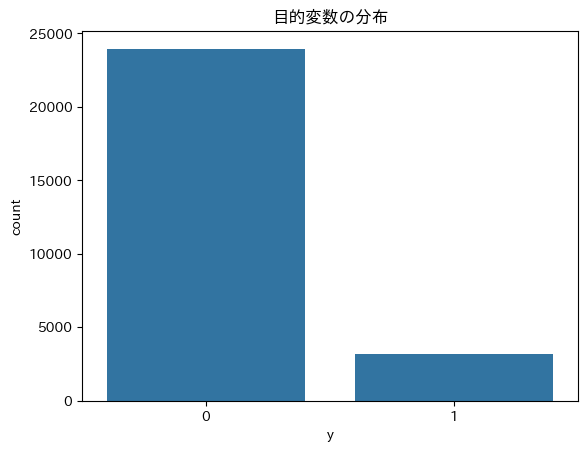

In [10]:
# 目的変数の分布の確認
sns.countplot(x='y', data=train_df)
plt.title('目的変数の分布')
plt.show()

#### 各説明変数の分布

In [11]:
# 数値型とカテゴリ型のカラムをそれぞれグルーピング
num_cols = train_df.select_dtypes(include=['int64','float64']).columns.drop(['id','y'])
cat_cols = train_df.select_dtypes(exclude=['int64','float64']).columns

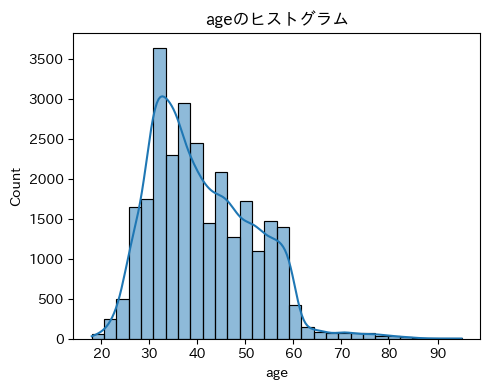

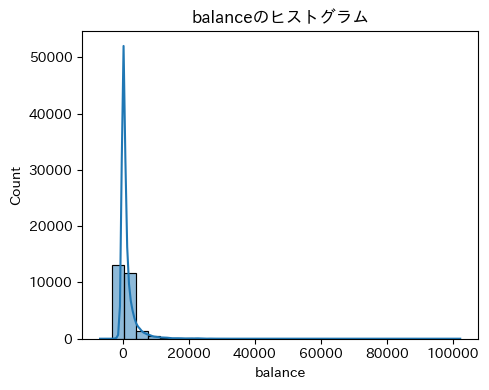

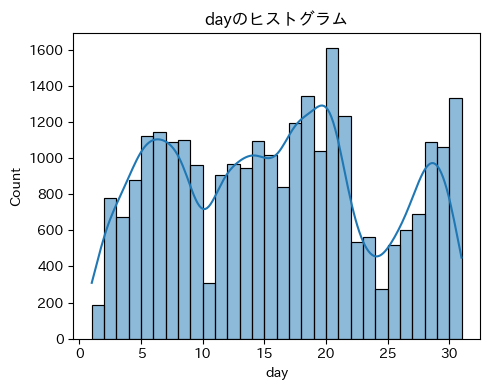

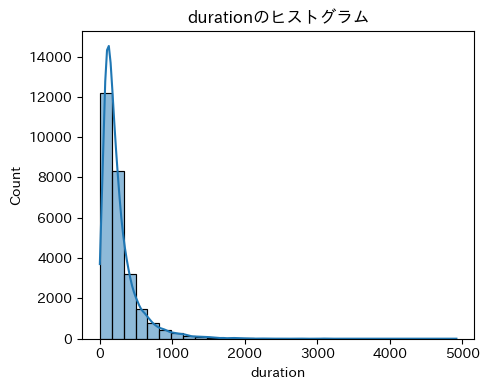

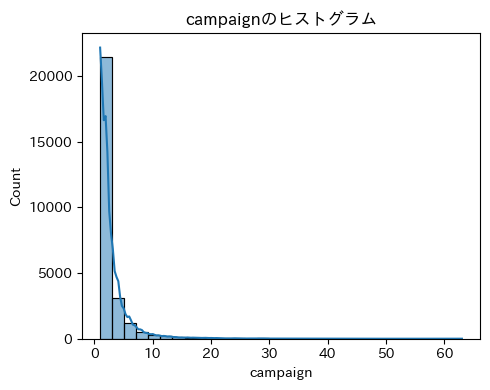

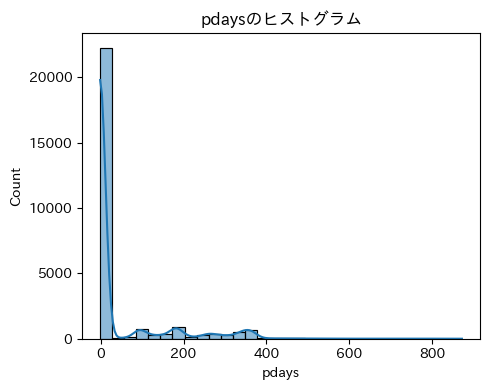

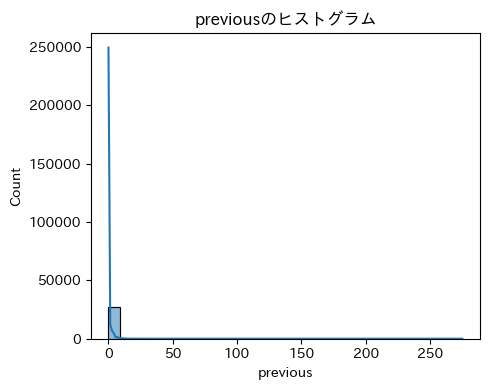

In [ ]:
# 数値型はヒストグラムで可視化
for col in num_cols:
    plt.figure(figsize=(5, 4))
    sns.histplot(train_df[col], kde=True, bins=30)
    plt.title(f"{col}のヒストグラム")
    plt.tight_layout()
    plt.show()

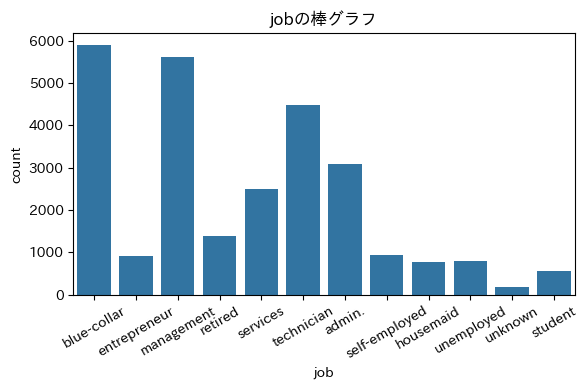

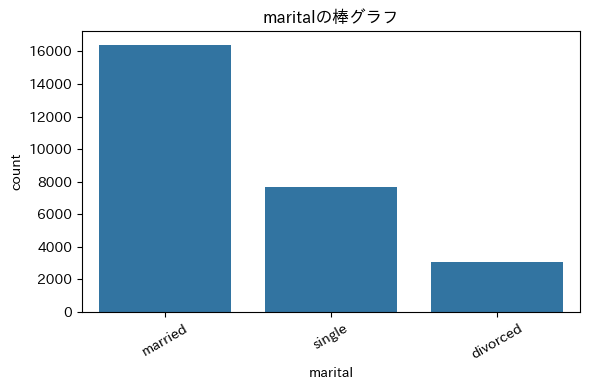

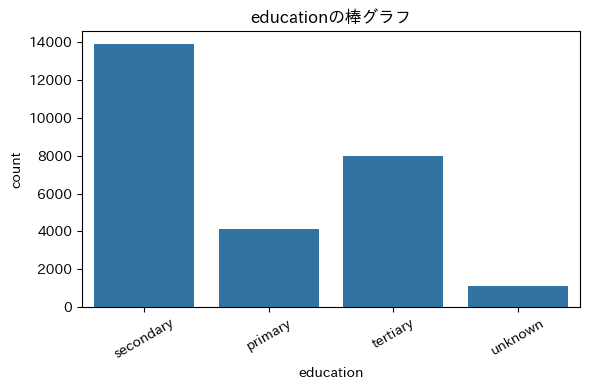

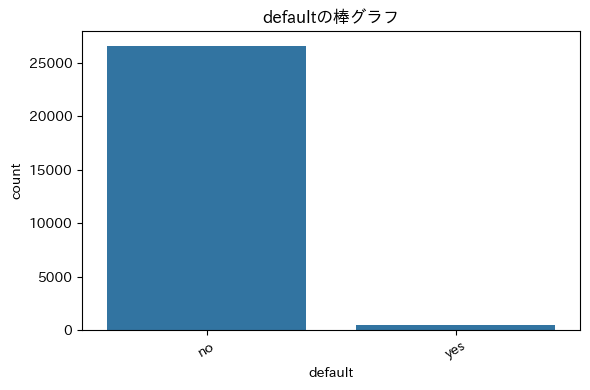

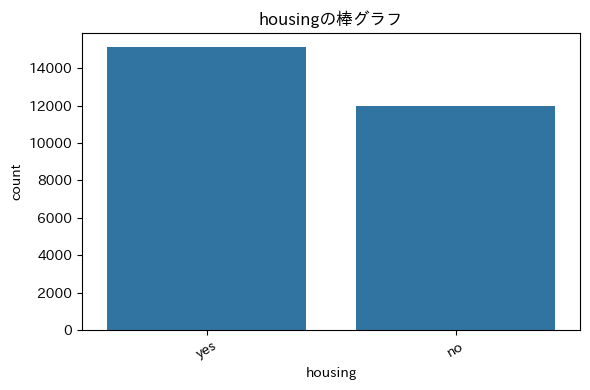

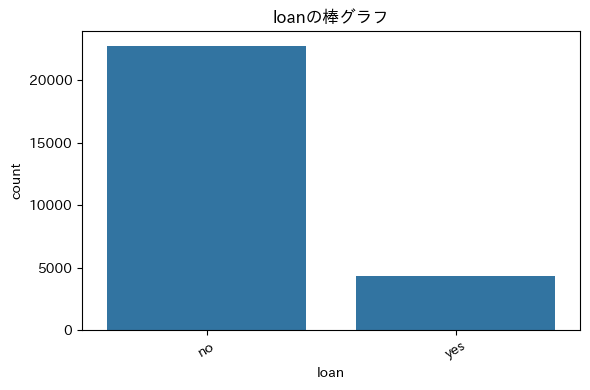

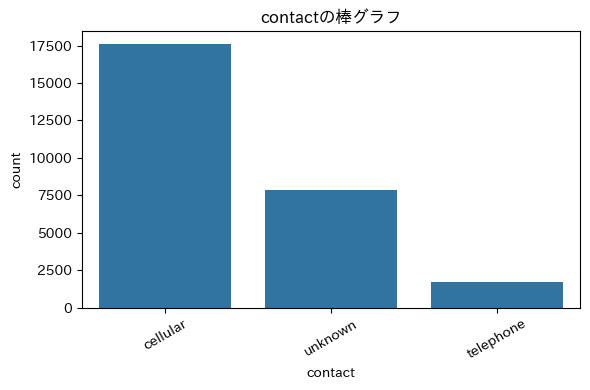

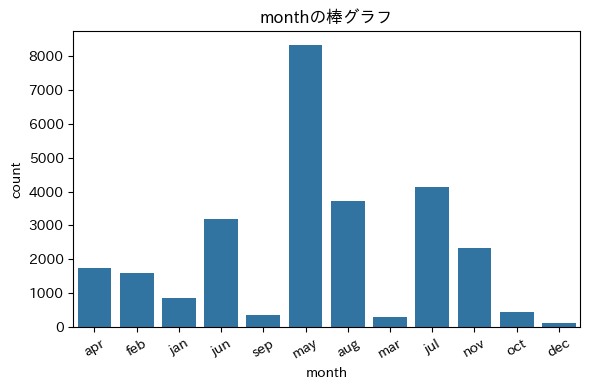

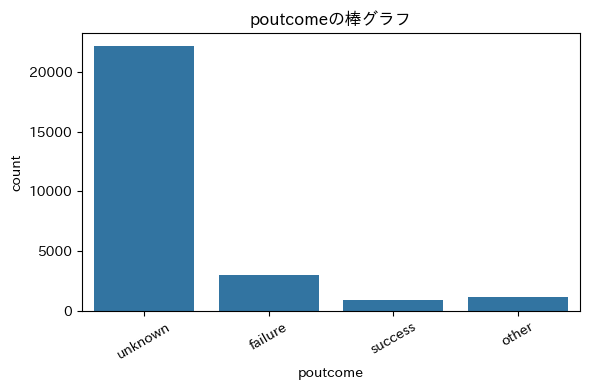

In [13]:
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=train_df)
    plt.title(f"{col}の棒グラフ")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

#### 目的変数との関係

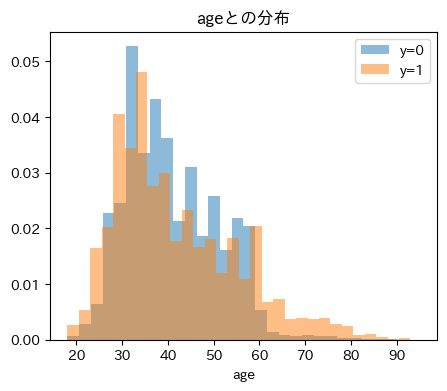

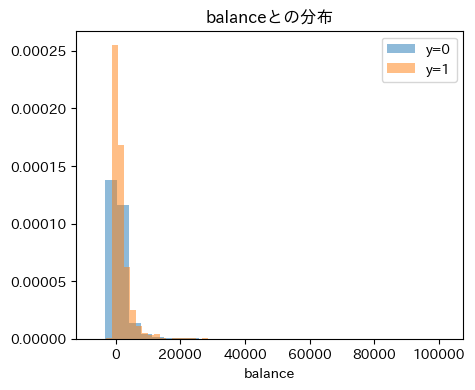

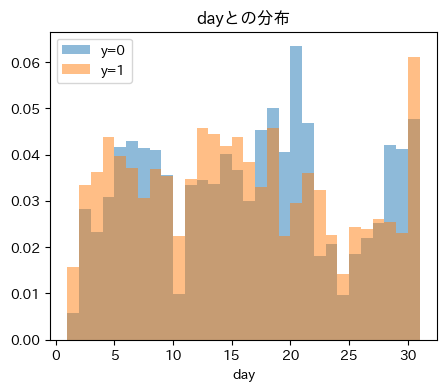

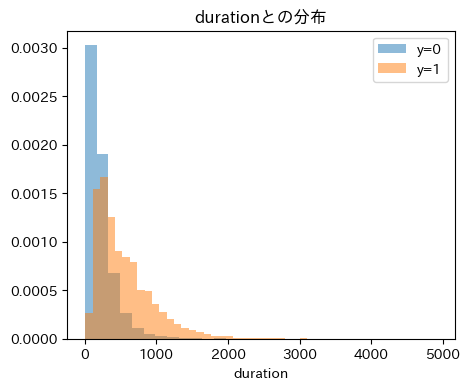

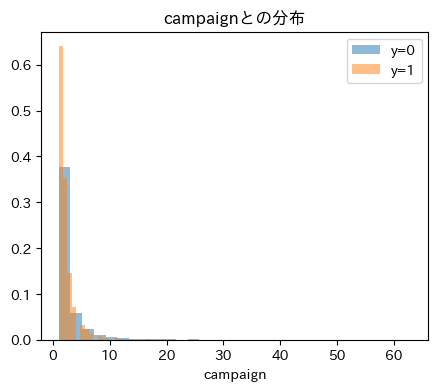

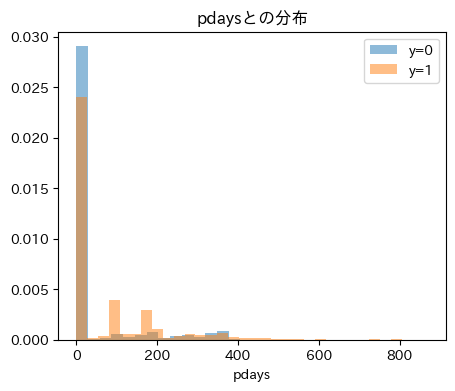

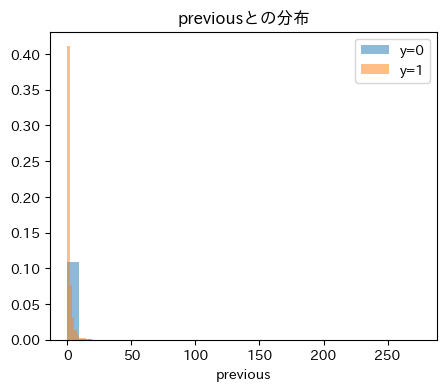

In [ ]:
# 数値型のカラムと目的変数の関係をヒストグラムで可視化
for col in num_cols:
    plt.figure(figsize=(5,4))
    plt.hist(train_df[train_df['y']==0][col], bins=30, alpha=0.5, label='y=0', density=True)
    plt.hist(train_df[train_df['y']==1][col], bins=30, alpha=0.5, label='y=1', density=True)
    plt.title(f'{col}との分布')
    plt.xlabel(col)
    plt.legend()
    plt.show()

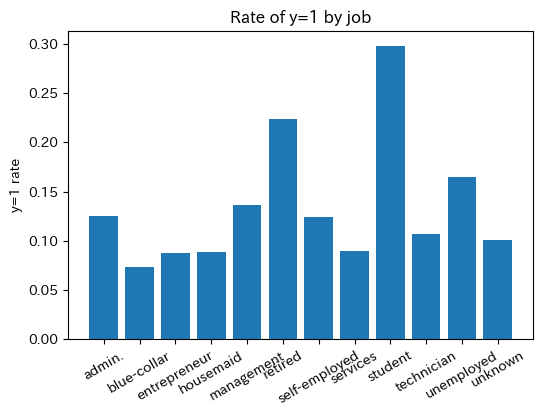

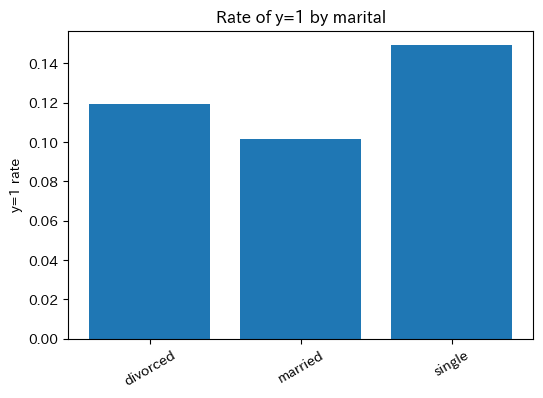

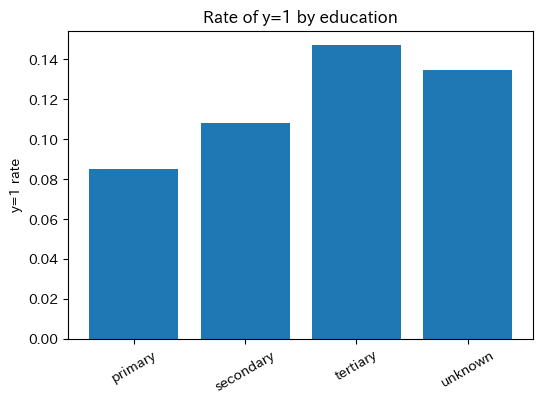

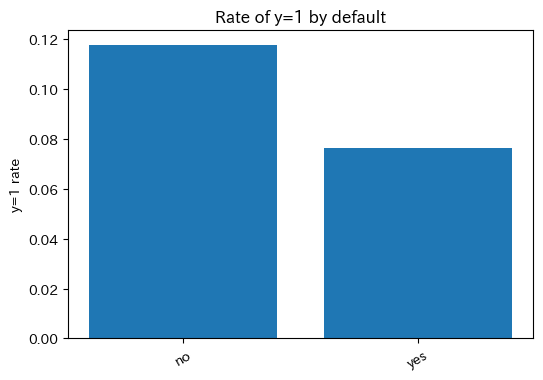

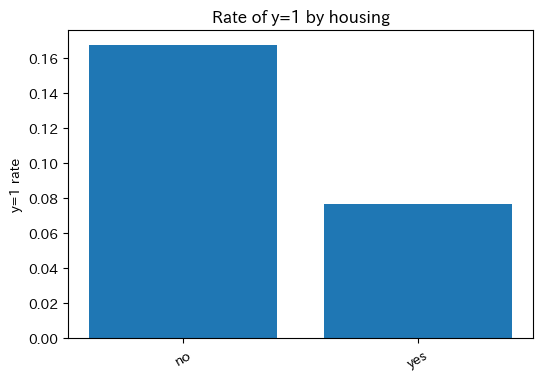

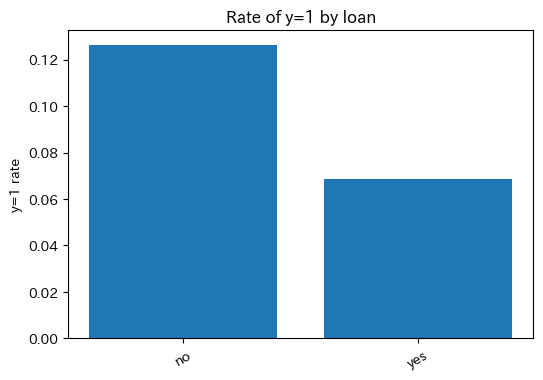

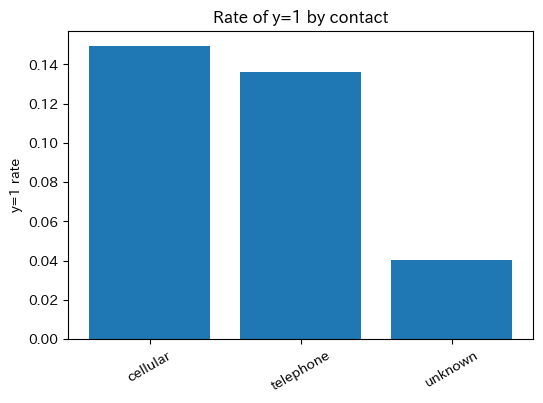

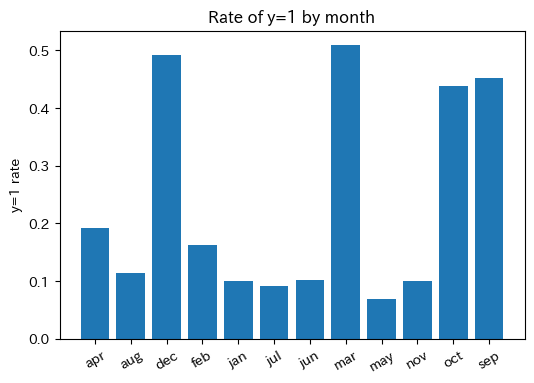

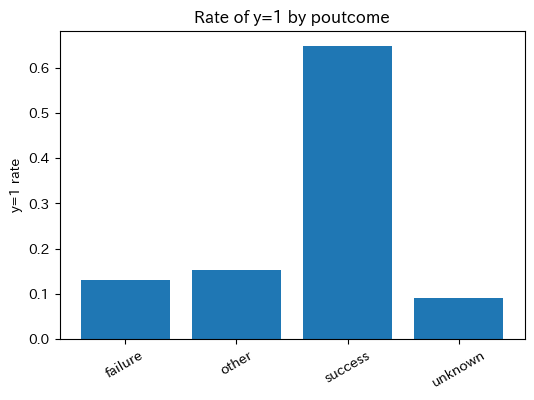

In [ ]:
for col in cat_cols:
    rates = train_df.groupby(col)['y'].mean()   # y=1 の比率
    plt.figure(figsize=(6,4))
    plt.bar(rates.index.astype(str), rates.values)
    plt.title(f'Rate of y=1 by {col}')
    plt.ylabel('y=1 rate')
    plt.xticks(rotation=30)
    plt.show()

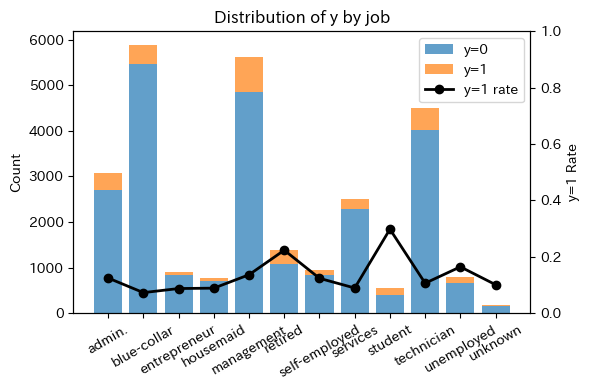

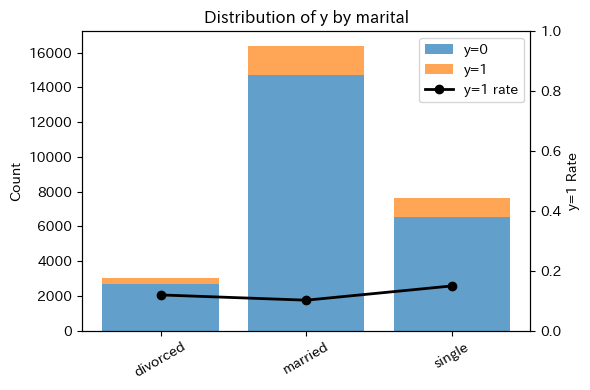

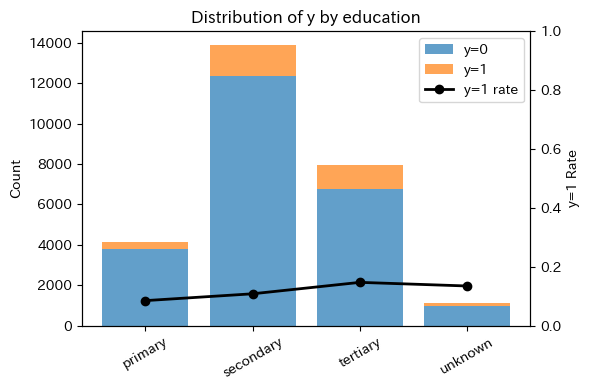

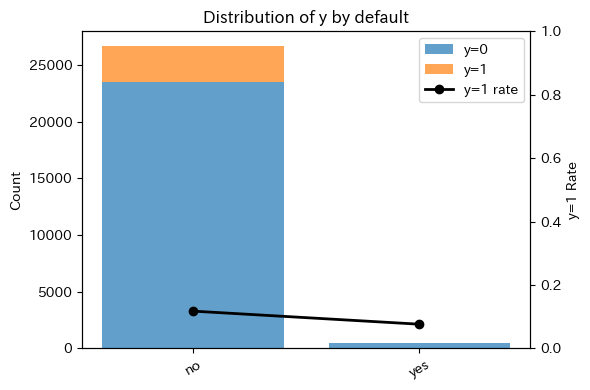

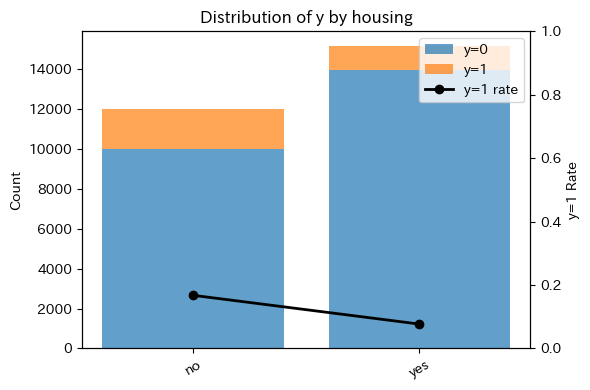

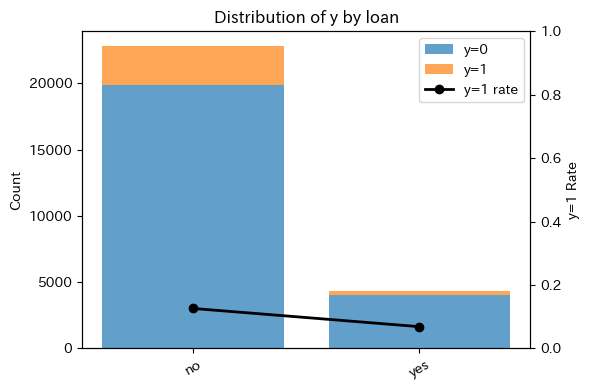

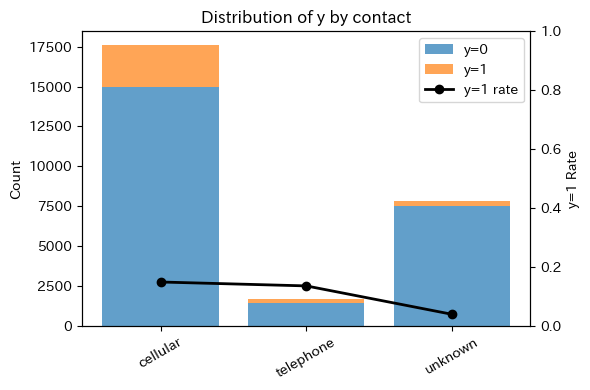

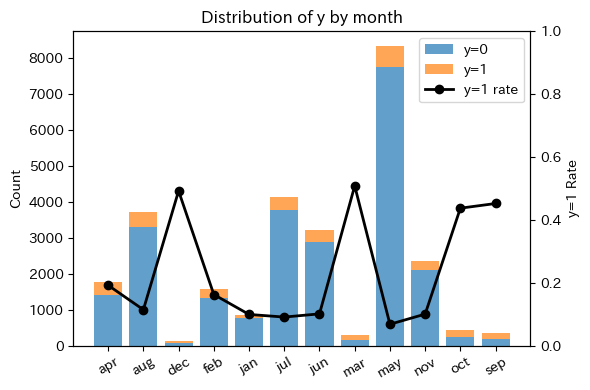

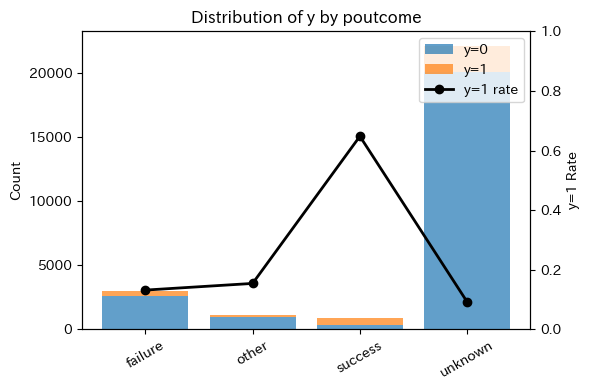

In [16]:
for col in cat_cols:
    # クロス集計（件数）
    crosstab = train_df.groupby([col, 'y']).size().unstack(fill_value=0)

    # y=1 の比率
    ratio = crosstab[1] / (crosstab[0] + crosstab[1])

    x = crosstab.index.astype(str)

    fig, ax1 = plt.subplots(figsize=(6,4))

    # --- 左軸：スタック棒グラフ（件数） ---
    ax1.bar(x, crosstab[0], label='y=0', alpha=0.7)
    ax1.bar(x, crosstab[1], bottom=crosstab[0], label='y=1', alpha=0.7)
    ax1.set_ylabel('Count')
    ax1.set_title(f'Distribution of y by {col}')
    ax1.tick_params(axis='x', rotation=30)

    # --- 右軸：y=1 の比率 ---
    ax2 = ax1.twinx()
    ax2.plot(x, ratio, marker='o', linestyle='-', linewidth=2, label='y=1 rate', color='black')
    ax2.set_ylabel('y=1 Rate')
    ax2.set_ylim(0, 1)  # 比率なので0〜1

    # 凡例をまとめる
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

    plt.tight_layout()
    plt.show()


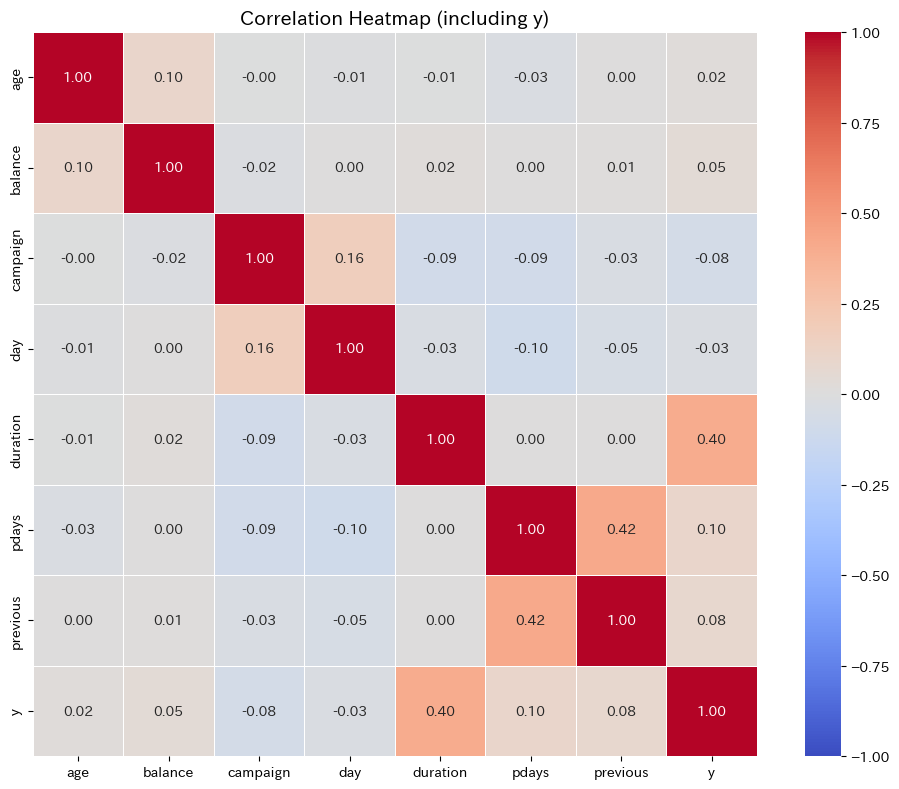

In [ ]:
# --- 相関行列 ---
corr = train_df[num_cols.union(['y'])].corr()

# --- ヒートマップ ---
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,        # セルに相関係数を表示（不要なら False）
    fmt=".2f",
    cmap="coolwarm",   # カラースケール
    vmin=-1, vmax=1,
    linewidths=0.5,
    square=True
)

plt.title("Correlation Heatmap (including y)", fontsize=14)
plt.tight_layout()
plt.show()

## 追加EDA

#### 分布の正規化

In [29]:
log_cols = []
prefix = '_log'

for col in ['duration', 'campaign', 'previous']:
    train_df[col + prefix] = np.log1p(train_df[col])
    log_cols.append(col + prefix)

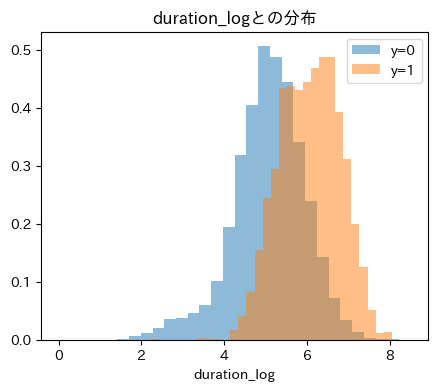

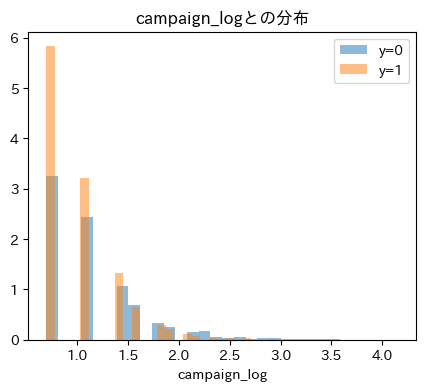

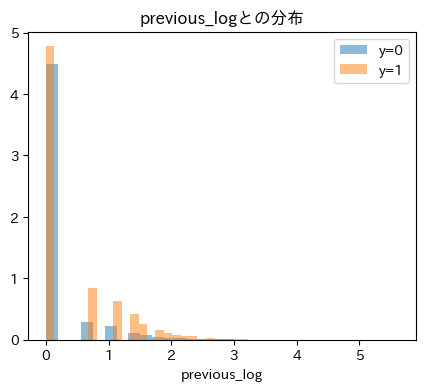

In [30]:
# 数値型のカラムと目的変数の関係をヒストグラムで可視化
for col in log_cols:
    plt.figure(figsize=(5,4))
    plt.hist(train_df[train_df['y']==0][col], bins=30, alpha=0.5, label='y=0', density=True)
    plt.hist(train_df[train_df['y']==1][col], bins=30, alpha=0.5, label='y=1', density=True)
    plt.title(f'{col}との分布')
    plt.xlabel(col)
    plt.legend()
    plt.show()

# NOTE: durationはlog変換良さそう
# NOTE: campaignはlog変換というよりはクリッピングが良さそう

#### 過去の接触が0の人を切り分ける

In [23]:
prev_cols = ['pdays', 'poutcome', 'previous']

display(train_df[prev_cols].value_counts())
display(train_df.loc[train_df['pdays'] == -1, 'previous'].value_counts())
display(train_df.loc[train_df['previous'] == 0, 'poutcome'].value_counts())

pdays  poutcome  previous
-1     unknown   0           22146
 370   failure   1              26
 368   failure   1              16
 182   success   1              15
 364   failure   1              15
                             ...  
 179   failure   1               1
 178   success   10              1
                 9               1
                 7               1
 871   failure   2               1
Name: count, Length: 2663, dtype: int64

previous
0    22146
Name: count, dtype: int64

poutcome
unknown    22146
Name: count, dtype: int64

In [ ]:
mask_new = (
    (train_df['pdays'] == -1) &
    (train_df['poutcome'] == 'unknown') &
    (train_df['previous'] == 0)
)

mask_new.mean()
# NOTE: 新規顧客は上記のmaskで完全に分離できる。また比率は約82%

0.8163521085225597

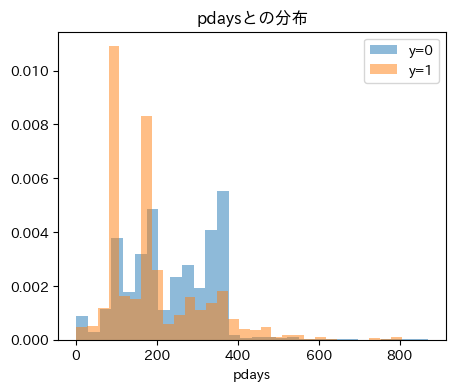

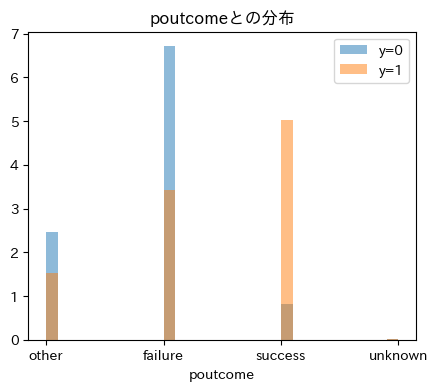

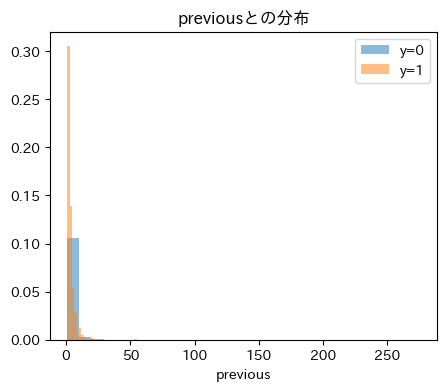

In [ ]:
# 既存客に絞って改めて、過去接触の分布を見てみる
train_df_existing = train_df[~mask_new]

for col in prev_cols:
    plt.figure(figsize=(5,4))
    plt.hist(train_df_existing[train_df_existing['y']==0][col], bins=30, alpha=0.5, label='y=0', density=True)
    plt.hist(train_df_existing[train_df_existing['y']==1][col], bins=30, alpha=0.5, label='y=1', density=True)
    plt.title(f'{col}との分布')
    plt.xlabel(col)
    plt.legend()
    plt.show()

# NOTE: pdayはいい感じ（〜200、400〜が開設しやすい？）
# NOTE: poutcomeでunknownが残っているが、これはotherと一緒にして記録漏れという真面目でないセールスマンのproxyにするのが良さそう？
# NOTE: previousはクリッピングして良さそう

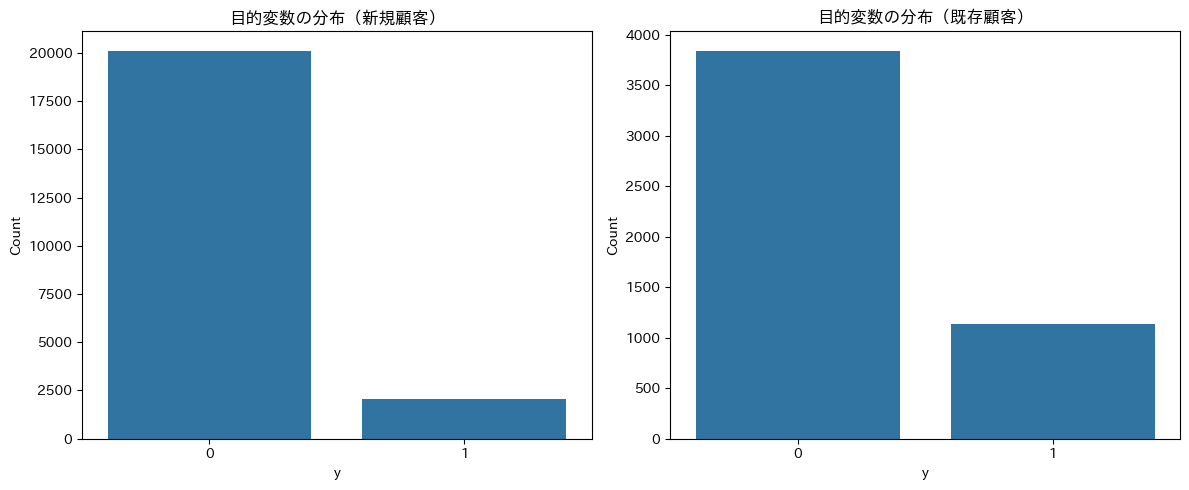

In [ ]:
train_df_new = train_df[mask_new]

# 図のサイズとレイアウト
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 新規顧客
sns.countplot(ax=axes[0], x='y', data=train_df_new)
axes[0].set_title('目的変数の分布（新規顧客）')
axes[0].set_xlabel('y')
axes[0].set_ylabel('Count')

# 既存顧客
sns.countplot(ax=axes[1], x='y', data=train_df_existing)
axes[1].set_title('目的変数の分布（既存顧客）')
axes[1].set_xlabel('y')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

#### クリッピング後の分布

In [33]:
prefix = '_clip'

upper = train_df['balance'].quantile(0.99)
train_df['balance' + prefix] = train_df['balance'].clip(upper=upper)
train_df['campaign' + prefix] = train_df['campaign'].clip(upper=10)
train_df['previous' + prefix] = train_df['previous'].clip(upper=5)

In [34]:
clipping_cols = []
for col in ['balance', 'campaign', 'previous']:
    clipping_cols.append(col + prefix)

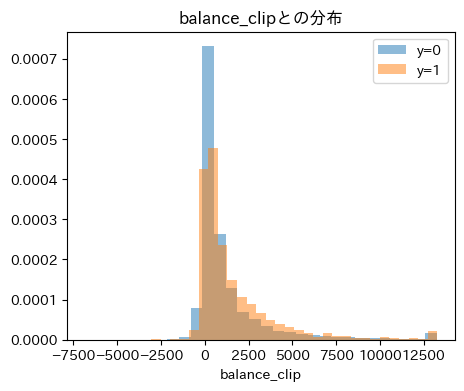

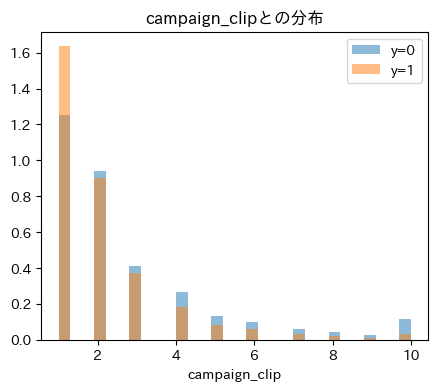

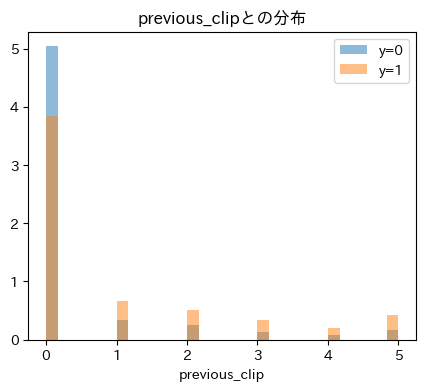

In [35]:
# クリッピング後の分布
for col in clipping_cols:
    plt.figure(figsize=(5,4))
    plt.hist(train_df[train_df['y']==0][col], bins=30, alpha=0.5, label='y=0', density=True)
    plt.hist(train_df[train_df['y']==1][col], bins=30, alpha=0.5, label='y=1', density=True)
    plt.title(f'{col}との分布')
    plt.xlabel(col)
    plt.legend()
    plt.show()

# NOTE: durationはlog変換良さそう
# NOTE: campaignはlog変換というよりはクリッピングが良さそう

#### contactの集約

In [41]:
train_df['contact_flg'] = (train_df['contact'] != 'unknown').astype('int8')

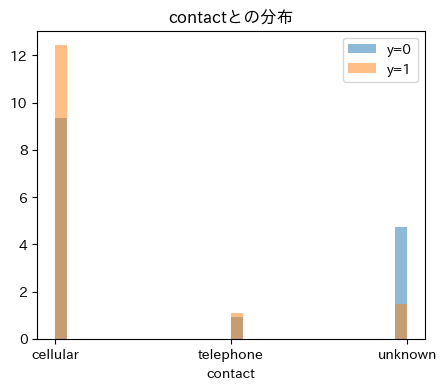

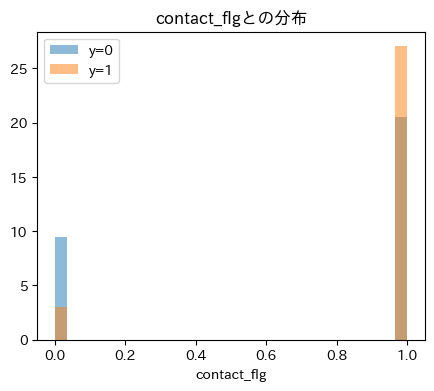

In [44]:
# 数値型のカラムと目的変数の関係をヒストグラムで可視化
for col in ['contact', 'contact_flg']:
    plt.figure(figsize=(5,4))
    plt.hist(train_df[train_df['y']==0][col], bins=30, alpha=0.5, label='y=0', density=True)
    plt.hist(train_df[train_df['y']==1][col], bins=30, alpha=0.5, label='y=1', density=True)
    plt.title(f'{col}との分布')
    plt.xlabel(col)
    plt.legend()
    plt.show()

#### ageのビン化

In [46]:
train_df['age'].describe()

count    27128.000000
mean        40.951010
std         10.608542
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [47]:
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']

train_df['age_bin'] = pd.cut(train_df['age'], bins=bins, labels=labels, right=False)

In [52]:
pd.set_option('display.max_rows', 100)
display(train_df[['age_bin', 'job']].value_counts())

age_bin  job          
35-44    blue-collar      2120
         management       1939
25-34    management       1853
         blue-collar      1788
         technician       1600
35-44    technician       1566
45-54    blue-collar      1430
         management       1235
25-34    admin.           1100
35-44    admin.           1011
45-54    technician        967
25-34    services          925
35-44    services          821
55-64    retired           761
45-54    admin.            696
         services          547
55-64    management        544
         blue-collar       449
65+      retired           405
35-44    entrepreneur      355
         self-employed     334
25-34    student           319
55-64    technician        307
25-34    self-employed     307
35-44    unemployed        262
45-54    entrepreneur      242
25-34    unemployed        237
45-54    housemaid         234
55-64    admin.            222
25-34    entrepreneur      211
45-54    self-employed     211
35-44    housema

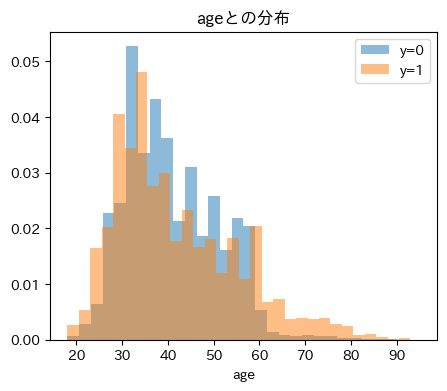

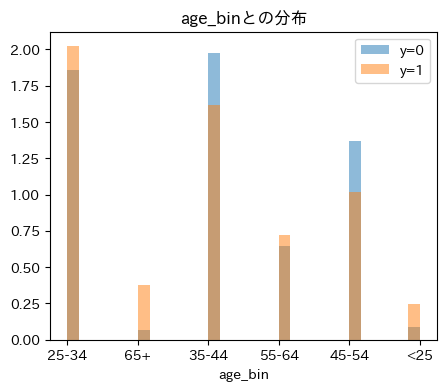

In [53]:
# bin化による効果を確認
for col in ['age', 'age_bin']:
    plt.figure(figsize=(5,4))
    plt.hist(train_df[train_df['y']==0][col], bins=30, alpha=0.5, label='y=0', density=True)
    plt.hist(train_df[train_df['y']==1][col], bins=30, alpha=0.5, label='y=1', density=True)
    plt.title(f'{col}との分布')
    plt.xlabel(col)
    plt.legend()
    plt.show()

#### jobの集約

In [58]:
train_df.groupby('job')['y'].value_counts()

job            y
admin.         0    2700
               1     385
blue-collar    0    5456
               1     430
entrepreneur   0     834
               1      80
housemaid      0     697
               1      68
management     0    4853
               1     767
retired        0    1080
               1     311
self-employed  0     828
               1     117
services       0    2282
               1     224
student        0     391
               1     166
technician     0    4013
               1     478
unemployed     0     660
               1     130
unknown        0     160
               1      18
Name: count, dtype: int64

In [ ]:
tmp = train_df.assign(
    is_white_collar = train_df['job'].isin(['management', 'admin.', 'technician']).astype(int),
    is_blue_collar  = (train_df['job'] == 'blue-collar').astype(int),
    is_non_worker   = train_df['job'].isin(['student', 'retired']).astype(int),
)

display(tmp.groupby('is_white_collar')['y'].agg(['count', 'mean']))
display(tmp.groupby('is_blue_collar')['y'].agg(['count', 'mean']))
display(tmp.groupby('is_non_worker')['y'].agg(['count', 'mean']))

,count,mean
is_white_collar,,
0,13932,0.110824
1,13196,0.123522


,count,mean
is_blue_collar,,
0,21242,0.129178
1,5886,0.073055


,count,mean
is_non_worker,,
0,25180,0.107109
1,1948,0.244867


In [ ]:
job_group_small = {
    'entrepreneur': 'small_business',
    'self-employed': 'small_business',
    'housemaid': 'small_business',
    'unemployed': 'small_business',
}

train_df['is_small_business'] = train_df['job'].isin([
    'entrepreneur', 'self-employed', 'housemaid', 'unemployed'
]).astype(int)

display(train_df.groupby('is_small_business')['y'].agg(['count', 'mean']))

display(train_df.groupby('job')['y'].mean().loc[
    ['entrepreneur', 'self-employed', 'housemaid', 'unemployed']
])

# NOTE: こっちは捨てて良さそう

,count,mean
is_small_business,,
0,23714,0.117188
1,3414,0.115700


job
entrepreneur     0.087527
self-employed    0.123810
housemaid        0.088889
unemployed       0.164557
Name: y, dtype: float64

#### month, dayの解釈

In [ ]:
month_order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

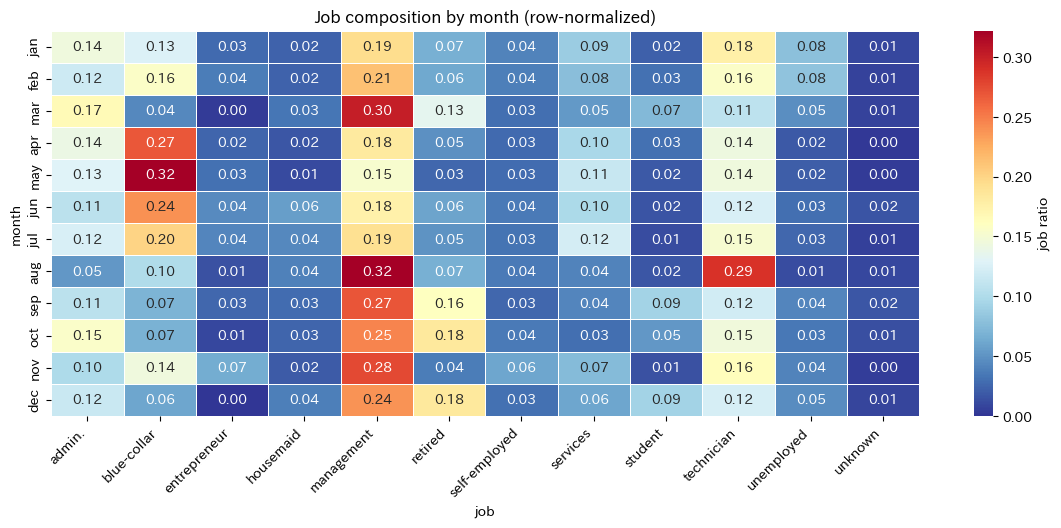

In [ ]:
# 職種との関係
job_ratio = pd.crosstab(
    train_df['month'],
    train_df['job'],
    normalize='index'
)
job_ratio = job_ratio.reindex(month_order)

plt.figure(figsize=(14, 5))
sns.heatmap(
    job_ratio,
    annot=True,
    fmt='.2f',
    cmap='RdYlBu_r',
    linewidths=0.5,
    cbar_kws={'label': 'job ratio'}
)
plt.title('Job composition by month (row-normalized)')
plt.xlabel('job')
plt.ylabel('month')
plt.xticks(rotation=45, ha='right')
plt.show()

# NOTE: 3月、9月、10月、12月はretiredとstudentの比率が高い（交絡因子の第一候補）

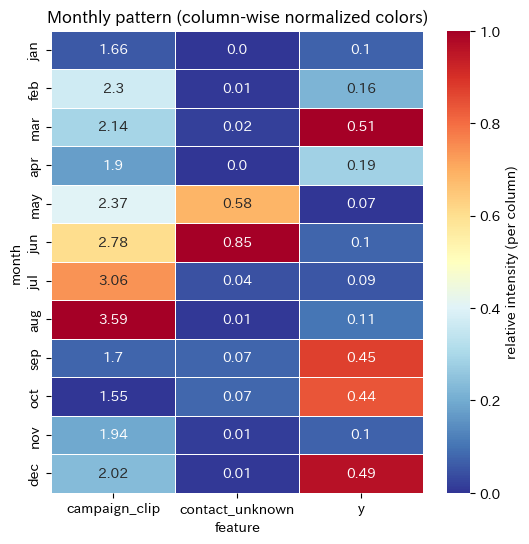

In [ ]:
# 営業の質との関係
heat_df = (
    train_df
    .groupby('month')[['campaign_clip', 'contact_unknown', 'y']]
    .mean()
)
heat_df = heat_df.reindex(month_order)

# 列ごとに 0–1 正規化（色付け専用）
heat_norm = (heat_df - heat_df.min()) / (heat_df.max() - heat_df.min())

plt.figure(figsize=(6, 6))
sns.heatmap(
    heat_norm,
    annot=heat_df.round(2),   # 数値は元の値
    fmt='',
    cmap='RdYlBu_r',
    linewidths=0.5,
    cbar=True,
    cbar_kws={'label': 'relative intensity (per column)'}
)

plt.title('Monthly pattern (column-wise normalized colors)')
plt.xlabel('feature')
plt.ylabel('month')
plt.show()

# NOTE: 5月、6月はcontact_unknownの割合が高く、営業の質が一定影響してそう

In [ ]:
# 新規客と既存客との関係
summary = (
    train_df
    .groupby(['month', 'new_flg'])['y']
    .agg(count='count', rate='mean')
    .reset_index()
)
summary_pivot = (
    summary
    .pivot(index='month', columns='new_flg', values=['count', 'rate'])
)
summary_pivot = summary_pivot.reindex(
    columns=[('count', 0), ('count', 1), ('rate', 0), ('rate', 1)]
)

summary_pivot.columns = [
    'existing_count', 'new_count',
    'existing_y=1_rate',  'new_y=1_rate'
]

summary_pivot['new_ratio'] = (
    summary_pivot['new_count'] /
    (summary_pivot['new_count'] + summary_pivot['existing_count'])
)
month_order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

display(summary_pivot.loc[month_order])

# NOTE: 新規客は5月〜8月に多く、9月〜12月は少ない
# NOTE: 新規客、既存客と分けても、3月、9月、10月、12月はどちらも成約率が高い（他の交絡因子の可能性）
# NOTE: 既存客においては6月〜8月、も高い

,existing_count,new_count,existing_y=1_rate,new_y=1_rate,new_ratio
month,,,,,
jan,312.0,534.0,0.125000,0.084270,0.631206
feb,564.0,1022.0,0.191489,0.146771,0.644388
mar,104.0,195.0,0.538462,0.492308,0.652174
apr,673.0,1082.0,0.157504,0.213494,0.616524
may,1513.0,6804.0,0.124256,0.055556,0.818083
jun,201.0,3003.0,0.487562,0.075258,0.937266
jul,150.0,3986.0,0.486667,0.076016,0.963733
aug,301.0,3417.0,0.458472,0.083992,0.919042
sep,197.0,159.0,0.548223,0.333333,0.446629


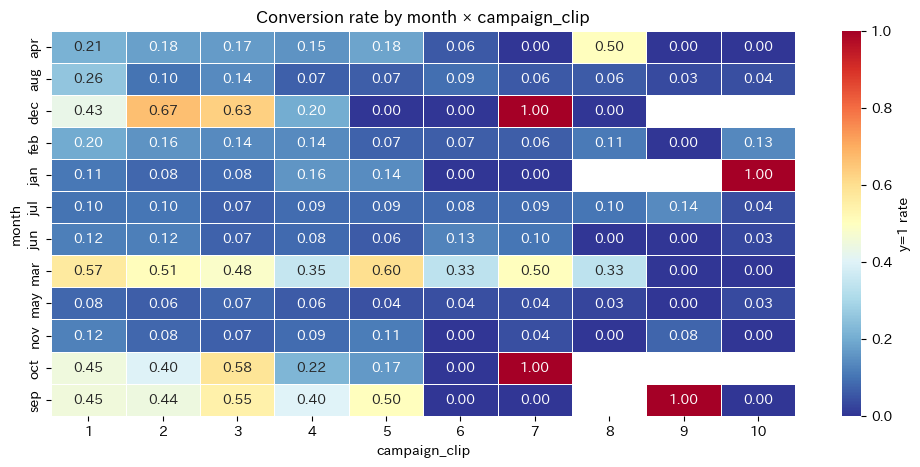

In [ ]:
# 接触回数との関係
heat_df = (
    train_df
    .groupby(['month', 'campaign_clip'])['y']
    .mean()
    .unstack()
)

plt.figure(figsize=(12, 5))
sns.heatmap(
    heat_df,
    cmap='RdYlBu_r',
    annot=True,
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={'label': 'y=1 rate'}
)
plt.title('Conversion rate by month × campaign_clip')
plt.xlabel('campaign_clip')
plt.ylabel('month')
plt.show()

# NOTE: 成約率の高い3月、9月、10月、12月はcampaignが少ないほど成約率も高くなっている（一部例外あり）

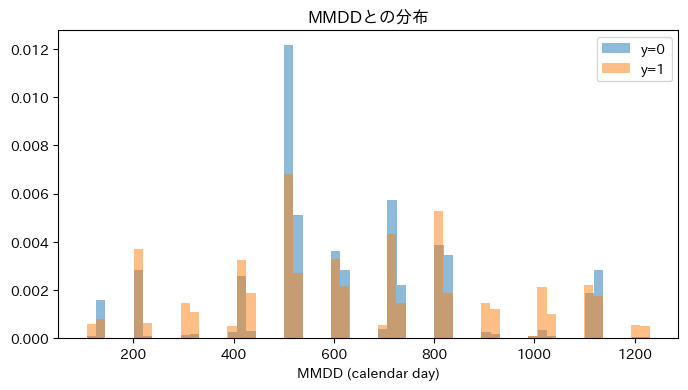

In [73]:
month_to_num = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12,
}

train_df['month_num'] = train_df['month'].map(month_to_num)
train_df['MMDD'] = train_df['month_num'] * 100 + train_df['day']

plt.figure(figsize=(8, 4))
plt.hist(
    train_df[train_df['y'] == 0]['MMDD'],
    bins=60,
    alpha=0.5,
    label='y=0',
    density=True
)
plt.hist(
    train_df[train_df['y'] == 1]['MMDD'],
    bins=60,
    alpha=0.5,
    label='y=1',
    density=True
)
plt.title('MMDDとの分布')
plt.xlabel('MMDD (calendar day)')
plt.legend()
plt.show()


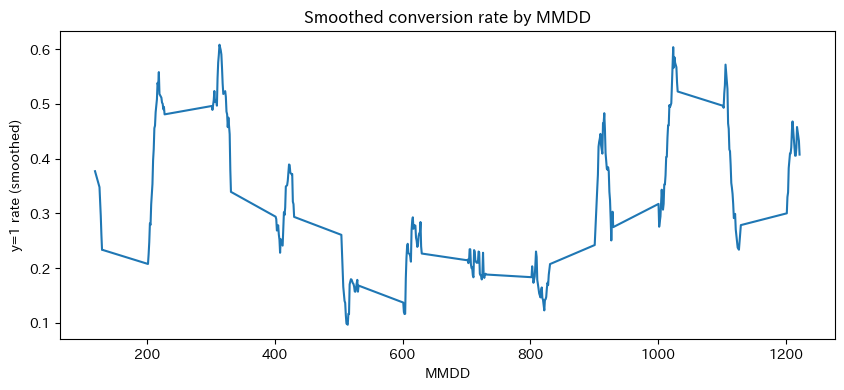

In [75]:
rate = (
    train_df
    .groupby('MMDD')['y']
    .mean()
    .rolling(window=15, center=True)
    .mean()
)

plt.figure(figsize=(10, 4))
plt.plot(rate.index, rate.values)
plt.xlabel('MMDD')
plt.ylabel('y=1 rate (smoothed)')
plt.title('Smoothed conversion rate by MMDD')
plt.show()

#### 雑な営業

In [ ]:
train_df['contact_unknown'] = (train_df['contact'] == 'unknown').astype('int8')
train_df['poutcome_unknown'] = train_df['poutcome'].isin(['unknown', 'other']).astype('int8')

display(
    pd.crosstab(
        train_df['contact_unknown'],
        train_df['poutcome_unknown'],
        margins=True
    )
)

# NOTE: contact_unknown ⊂ poutcome_unknown

poutcome_unknown,0,1,All
contact_unknown,,,
0,3829,15438,19267
1,26,7835,7861
All,3855,23273,27128


In [95]:
display(
    train_df
    .groupby('contact_unknown')['y']
    .agg(count='count', rate='mean')
)
display(
    train_df
    .groupby('poutcome_unknown')['y']
    .agg(count='count', rate='mean')
)
display(
    train_df
    .groupby(['contact_unknown', 'poutcome_unknown'])['y']
    .agg(count='count', rate='mean')
)

,count,rate
contact_unknown,,
0,19267,0.148388
1,7861,0.040071


,count,rate
poutcome_unknown,,
0,3855,0.250324
1,23273,0.094917


count      rate
contact_unknown poutcome_unknown                 
0               0                  3829  0.250979
                1                 15438  0.122943
1               0                    26  0.153846
                1                  7835  0.039694

In [96]:
display(
    train_df
    .groupby(['new_flg', 'contact_unknown', 'poutcome_unknown'])['y']
    .agg(count='count', rate='mean')
)

count      rate
new_flg contact_unknown poutcome_unknown                 
False   0               0                  3829  0.250979
                        1                  1113  0.153639
        1               0                    26  0.153846
                        1                    14  0.285714
True    0               1                 14325  0.120558
        1               1                  7821  0.039253

#### 硬化した顧客

In [ ]:
display(train_df.groupby('campaign_clip')['y'].agg(['count', 'mean']))
display(train_df.groupby('previous_clip')['y'].agg(['count', 'mean']))

# NOTE: campaignは単調減少（しつこさが素直に出ている）
# NOTE: previous=0は新規なので、>1を見るとあまり差異がない、むしろ増加傾向？（多い＝関係性が築けていると捉えても良さそう）

,count,mean
campaign_clip,,
1,10555,0.147513
2,7599,0.113173
3,3295,0.106829
4,2070,0.085024
5,1021,0.076396
6,762,0.077428
7,445,0.067416
8,319,0.062696
9,195,0.046154


,count,mean
previous_clip,,
0,22146,0.091845
1,1684,0.211401
2,1273,0.212097
3,689,0.255443
4,445,0.244944
5,891,0.257015


In [ ]:
display(train_df.groupby(['new_flg', 'campaign_clip'])['y'].mean())
display(train_df.groupby(['new_flg', 'previous_clip'])['y'].mean())

# NOTE: campaignはどちらも単調減少だが、既存客の方が勾配が急

new_flg  campaign_clip
False    1                0.267220
         2                0.218529
         3                0.215213
         4                0.146825
         5                0.124088
         6                0.100000
         7                0.064516
         8                0.054054
         9                0.058824
         10               0.041667
True     1                0.112093
         2                0.089086
         3                0.085631
         4                0.076458
         5                0.069005
         6                0.074405
         7                0.067885
         8                0.063830
         9                0.044944
         10               0.037960
Name: y, dtype: float64

new_flg  previous_clip
False    1                0.211401
         2                0.212097
         3                0.255443
         4                0.244944
         5                0.257015
True     0                0.091845
Name: y, dtype: float64

In [ ]:
display(train_df.groupby(
    ['campaign_clip', 'contact_unknown']
)['y'].mean())

display(train_df.groupby(
    ['previous_clip', 'poutcome_unknown']
)['y'].mean())

# NOTE: campaignは営業要因とは独立として考えて良さそう

campaign_clip  contact_unknown
1              0                  0.192214
               1                  0.042762
2              0                  0.140984
               1                  0.040778
3              0                  0.138085
               1                  0.040000
4              0                  0.100715
               1                  0.039548
5              0                  0.095368
               1                  0.027875
6              0                  0.084775
               1                  0.054348
7              0                  0.078313
               1                  0.035398
8              0                  0.077869
               1                  0.013333
9              0                  0.064748
               1                  0.000000
10             0                  0.044014
               1                  0.026756
Name: y, dtype: float64

previous_clip  poutcome_unknown
0              1                   0.091845
1              0                   0.233333
               1                   0.131868
2              0                   0.224490
               1                   0.159836
3              0                   0.280000
               1                   0.158273
4              0                   0.271642
               1                   0.163636
5              0                   0.291465
               1                   0.177778
Name: y, dtype: float64

In [102]:
display(train_df.groupby(
    ['month', 'campaign_clip']
)['y'].mean())

display(train_df.groupby(
    ['month', 'previous_clip']
)['y'].mean())

month  campaign_clip
apr    1                0.213470
       2                0.178641
       3                0.171717
       4                0.153846
       5                0.183673
                          ...   
sep    5                0.500000
       6                0.000000
       7                0.000000
       9                1.000000
       10               0.000000
Name: y, Length: 112, dtype: float64

month  previous_clip
apr    0                0.213494
       1                0.132576
       2                0.195652
       3                0.151163
       4                0.133333
       5                0.170213
aug    0                0.083992
       1                0.434343
       2                0.391304
       3                0.394737
       4                0.515152
       5                0.580645
dec    0                0.526316
       1                0.478261
       2                0.400000
       3                0.500000
       4                0.571429
       5                0.500000
feb    0                0.146771
       1                0.164948
       2                0.174825
       3                0.152778
       4                0.259259
       5                0.257426
jan    0                0.084270
       1                0.144144
       2                0.142857
       3                0.121951
       4                0.148148
       5              

#### jobやeducationの関係

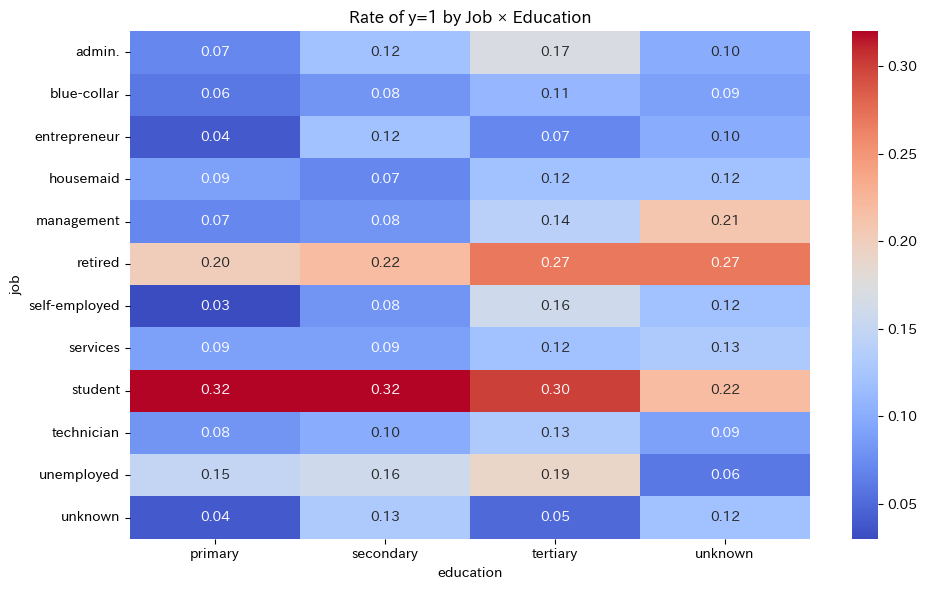

In [18]:
# クロス集計（契約率 y=1 の平均）
ct = pd.crosstab(
    index=train_df['job'],
    columns=train_df['education'],
    values=train_df['y'],
    aggfunc='mean'
).round(2).fillna(0)

# ヒートマップ
plt.figure(figsize=(10, 6))
sns.heatmap(ct, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Rate of y=1 by Job × Education")
plt.xlabel("education")
plt.ylabel("job")
plt.tight_layout()
plt.show()

# educationに関係なく、studentとretiredはy=1になりやすい

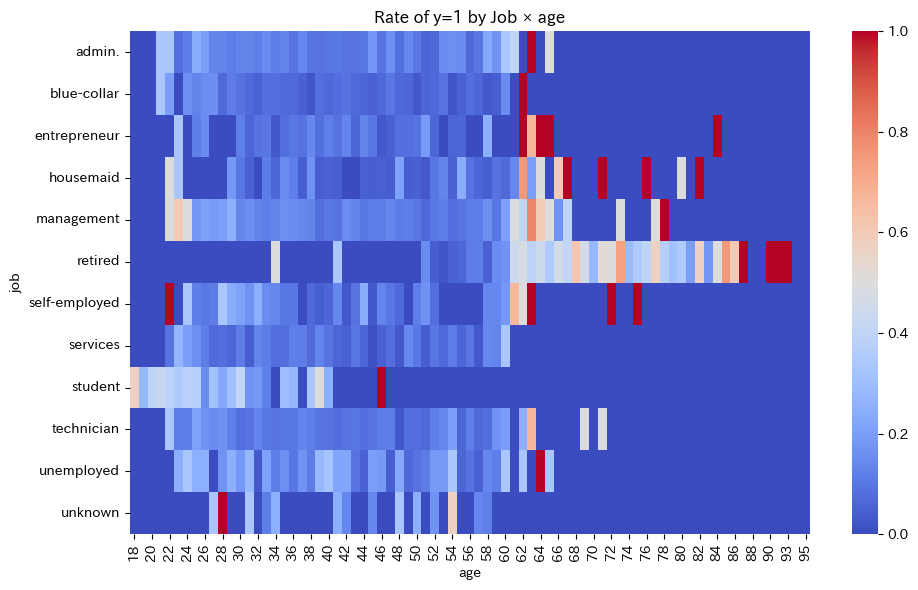

In [ ]:
# クロス集計（契約率 y=1 の平均）
ct = pd.crosstab(
    index=train_df['job'],
    columns=train_df['age'],
    values=train_df['y'],
    aggfunc='mean'
).round(2).fillna(0)

# ヒートマップ
plt.figure(figsize=(10, 6))
sns.heatmap(ct, fmt=".2f", cmap='coolwarm')
plt.title("Rate of y=1 by Job × age")
plt.xlabel("age")
plt.ylabel("job")
plt.tight_layout()
plt.show()

# NOTE: 職種に問わず高齢層の方がy=1になりやすい
# NOTE: studentは年齢が低い人ではなく46歳がy=1となっている

In [20]:
student_df = train_df[train_df['job'] == 'student']
age_counts = student_df['age'].value_counts().sort_index()
age_y_rate = student_df.groupby('age')['y'].mean()

summary = pd.DataFrame({
    'count': age_counts,
    'y_rate': age_y_rate
}).fillna(0)

display(summary)

,count,y_rate
age,,
18,7,0.571429
19,25,0.280000
20,25,0.400000
21,24,0.416667
22,44,0.386364
23,31,0.354839
24,40,0.375000
25,46,0.369565
26,59,0.152542


## EDAまとめ

#### データの確認

In [ ]:
# データ型
# NOTE: 二値カラムもobjectになっている。monthもobjectになっている

# 要約統計量の確認
# NOTE: duration・campaignは分布が歪んでそう。
# NOTE: pdayの-1、previousの0は別カラムとして分割した方が良さそう（前キャンペーンでは接触していない新規顧客？）

# カテゴリカラムのユニーク値
# NOTE: unknownはNAにしても良いかも
# NOTE: jobは種類が多いので、集約しても良い？
# NOTE: contactはcellelar（携帯電話）とtelephone（電話）は同じにして接触有無とすると除外してよい？

#### 各説明変数の分布

In [ ]:
# 数値型
# NOTE: ageはビン化してもいいかも
# NOTE: balanceはクリッピングしても良い？

#### 目的変数との関係

In [ ]:
# 数値型
# NOTE: 若年層と高齢層は開設しやすそう→フラグを作る
# NOTE: balance・duration・pdaysは全体的に多い方が解説しやすそう
# TODO: dayはもう少し分析したほうが良さそう
# NOTE: campaign・previousは少ない方が開設しやすい？（接触回数が多い＝硬化した顧客？）

# object型
# NOTE: studentやretiredは年齢と相関してそう（それ以外のカテゴリを追加分析するべきか）
# NOTE: contactから接触方法がわかっている（真面目なセールスマンのproxy）と開設しやすそう
# TODO: 3月、9月、10月、12月が異常に開設率が高い（何か傾向がある？）
# NOTE: poutcomeのotherの取り扱いは要検討（failureに寄せるか、真面目でないセールスマンのproxyにする？）

# 相関係数
# NOTE: durationが最も相関が強い

#### 前処理・FEの方針

- 前処理
    - [済み]フラグ化
        - [済み]新規客フラグ：pdaysが-1
        - [済み]default
        - [済み]housing
        - [済み]loan
        - [済み]contact：集約してフラグ化
    - [済み]log変換
        - duration
    - [済み]クリッピング
        - [済み]balance：99％地点
        - [済み]campaign：10（過剰フラグも作る）
        - [済み]previous：5（過剰フラグも作る）
    - [済み]unknownのNA化（フラグは立てて、元の特徴量ではNaNにする）
        - job
        - education
        - contact
    - [済み]ageのビン化
        - 元のageは残す
        - <25xstudent、55>xretiredのフラグは作る
    - [済み]jobの集約
        - 元のjobは残す
        - 以下のフラグを作り、交互作用を用いる場合はこちらを使う
            - is_non_worker
                - student
                - retired
            - is_blue_collar
                - blue-collar
            - is_white_collar
                - management
                - admin.
                - technician
                - services
            - is_service_worker
                - services
            - is_unemployed
                - unemployed
            - is_self_employed
                - entrepreneur
                - self-employed
            - is_housemaid
                - housemaid
    - [済み]month, dayの取り扱い
        - [済み]dayは削除、monthは数値化
        - [済み]交絡因子特定のために以下の交互作用は作成する
            - month × new_flg
            - month × campaign_clip
            - month × contact_unknown
- FE
    - [済み]セールスマンの真面目度のproxy（ディスカウント特徴量）
        - スコア化は情報の圧縮になるのでフラグ＋交互作用
            - [済み]フラグ
                - 過去のキャンペーンの記録があるか
                    - contactのunkwon
                    - poutcomeのotherとunknown
            - [済み]交互作用
                - contact_unknown × campaign_clip（雑な営業x今回のしつこさ）
                - contact_unknown × new_flg（雑な営業x新規）
                - poutcome_unknown × previous（雑な営業x前回のしつこさ）

    - [済み]硬化した顧客
        - campaign(現キャンペーンにおける接触回数)で作る